In [1]:
import os
import sys
import inspect
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0, parentdir)

from sklearn import metrics
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from wordEmbedders import WESCScore
from functions import dirs, canonicalNames

In [2]:
datasets = dirs('../data')
names = canonicalNames('../data')

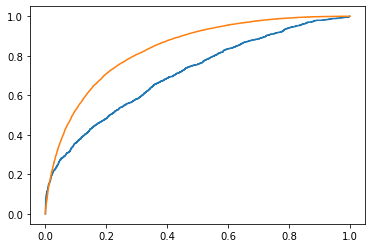

In [3]:
fig, ax = plt.subplots()

for dataset in datasets:
    dataFile = f'../data/{dataset}/Word2Vec-Prediction.csv'
    if not os.path.exists(dataFile):
        raise ValueError(f'Dataset {dataset} has not been predicted')

    result = WESCScore.load(dataFile)
    fpr, tpr, auc = result.roc_auc_curve()
    label = f'{names[dataset]} {auc:.3f}'

    ax.plot(fpr, tpr, label=label)

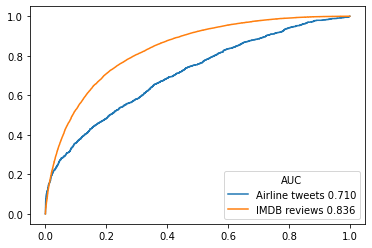

In [4]:
fig.patch.set_alpha(1)
ax.legend(title='AUC')
fig.savefig('./Results-ROCAUC.png')
fig